In [55]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [56]:
raw_data = pd.read_csv('HR_comma_sep.csv')

In [57]:
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [58]:
raw_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [59]:
raw_data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [60]:
salary_mapping = {'low':1,'medium':3,'high':5}

In [61]:
raw_data['salary'] = raw_data.salary.replace(salary_mapping)

In [62]:
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,3
2,0.11,0.88,7,272,4,0,1,0,sales,3
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [63]:
raw_data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [64]:
dummies = pd.get_dummies(raw_data['sales'], prefix='sales', drop_first=False)
raw_data = pd.concat([raw_data, dummies], axis=1)
raw_data = raw_data.drop('sales',axis=1)

In [65]:
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,3,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,3,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [66]:
columns_to_be_normalized = ['number_project','average_montly_hours','time_spend_company','salary']
scaled_features = {}
for each in columns_to_be_normalized:
    mean, std = raw_data[each].mean(), raw_data[each].std()
    scaled_features[each] = [mean, std]
    raw_data.loc[:, each] = (raw_data[each] - mean)/std

In [67]:
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,-1.462814,-0.882010,-0.341224,0,1,0,-0.933337,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,0.971081,1.220382,1.713379,0,1,0,0.636071,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,2.593677,1.420610,0.343644,0,1,0,0.636071,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,0.971081,0.439493,1.028511,0,1,0,-0.933337,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,-1.462814,-0.841965,-0.341224,0,1,0,-0.933337,0,0,0,0,0,0,0,1,0,0


In [68]:
number_of_columns = raw_data.columns.size
number_of_rows = len(raw_data)
test_size = 1000
validation_size = 3000
target_field = ['left']

In [69]:
raw_data = shuffle(raw_data)

In [70]:
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
12645,0.40,0.54,-1.462814,-1.202375,-0.341224,0,1,0,0.636071,0,0,0,0,0,0,0,0,0,1
202,0.76,1.00,0.971081,0.359402,1.028511,0,1,0,-0.933337,0,0,0,0,0,0,0,0,1,0
7397,0.63,0.64,0.159782,-0.461532,-0.341224,0,0,0,-0.933337,0,0,0,0,0,0,1,0,0,0
3114,0.30,0.64,-1.462814,-1.282466,-0.341224,0,0,0,2.205479,0,0,0,0,1,0,0,0,0,0
4981,0.80,0.96,0.971081,-1.542762,-0.341224,0,0,0,-0.933337,0,0,0,0,0,0,0,1,0,0


In [71]:
test_data = raw_data[:test_size]
validation_data = raw_data[test_size:test_size+validation_size]
train_data = raw_data[test_size+validation_size:len(raw_data)]

In [72]:
print('testing set size',len(test_data))
print('testing set size',len(validation_data))
print('training set data',len(train_data))

testing set size 1000
testing set size 3000
training set data 10999


In [73]:
train_features,train_target = train_data.drop(target_field,axis=1),train_data[target_field]
validation_features,validation_target = validation_data.drop(target_field,axis=1),validation_data[target_field]
test_features,test_target = test_data.drop(target_field,axis=1),test_data[target_field]

In [74]:
train_features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
11251,0.78,0.50,0.971081,0.920040,0.343644,0,0,0.636071,0,0,0,0,0,0,1,0,0,0
10195,1.00,0.61,0.971081,-0.461532,-0.341224,0,0,0.636071,0,0,0,0,0,0,0,0,0,1
14713,0.11,0.87,2.593677,1.620838,1.028511,0,0,-0.933337,0,0,0,0,0,0,0,0,0,1
14767,0.46,0.48,-1.462814,-1.202375,-0.341224,1,0,-0.933337,0,0,0,0,0,0,0,1,0,0
871,0.87,0.94,0.159782,1.180337,1.028511,0,0,-0.933337,0,0,0,1,0,0,0,0,0,0


In [75]:
train_target.head()

,left
11251,0
10195,0
14713,1
14767,1
871,1


In [76]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        
        self.weights_i_h = np.random.normal(0.0, self.input_nodes**-0.5,(self.input_nodes, self.hidden_nodes))
        #self.biases_i_h = 
        self.weights_h_o = np.random.normal(0.0, self.hidden_nodes**-0.5,(self.hidden_nodes, self.output_nodes))
        #self.biases_h_o = 
        self.activation_function = lambda x : 1/(1+np.exp(-x))
    
    def train(self,features,target):
        
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_i_h.shape)
        delta_weights_h_o = np.zeros(self.weights_h_o.shape)

        for X, y in zip(features, target):
            
            #forward pass
            hidden_inputs = np.dot(X,self.weights_i_h)
            hidden_output = self.activation_function(hidden_inputs)
            
            final_input = np.dot(hidden_output,self.weights_h_o)
            final_output = self.activation_function(final_input)
            #error calculation
            error = y - final_output

            output_error_term = error * final_output *(1-final_output)

            hidden_error = error * self.weights_h_o.T
            hidden_error_term = hidden_error * hidden_output * ( 1 - hidden_output)
            
            delta_weights_i_h += hidden_error_term * X[:,None]
            delta_weights_h_o += output_error_term * hidden_output[:,None]
            
        self.weights_h_o += self.learning_rate * delta_weights_h_o/n_records             
        self.weights_i_h += self.learning_rate * delta_weights_i_h/n_records 
            
        
    def run(self,features):

        hidden_inputs = np.dot(features,self.weights_i_h)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(hidden_outputs,self.weights_h_o)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    def test(self,features):
        
        hidden_inputs = np.dot(features,self.weights_i_h)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(hidden_outputs,self.weights_h_o)
        final_outputs = self.activation_function(final_inputs) 
        
        return final_outputs,self.activation_function(final_outputs)
        

In [77]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [81]:
iterations = 25000
learning_rate = 0.1
hidden_nodes = 5
output_nodes = 1
N_i = train_features.shape[1]

In [25]:
print(N_i)

18


In [82]:
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

In [83]:
import sys 

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_target.ix[batch]['left']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_target['left'].values)
    val_loss = MSE(network.run(validation_features).T, validation_target['left'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 100.0% ... Training loss: 0.058 ... Validation loss: 0.059

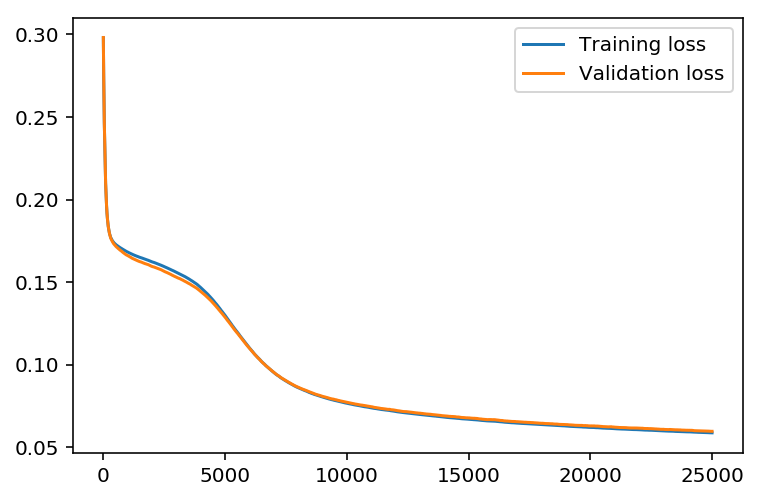

In [84]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [85]:
predictions,sigmoid_predictions = network.test(test_features)




In [86]:
print(len(predictions))
print(len(sigmoid_predictions))
print(len(test_target))

1000
1000
1000


In [87]:
for i in range(1000):
    print(sigmoid_predictions[i],test_target.values[i])

[ 0.69799431] [1]
[ 0.6311557] [1]
[ 0.50258138] [0]
[ 0.70115832] [0]
[ 0.50291891] [0]
[ 0.5033864] [0]
[ 0.50476742] [0]
[ 0.56920935] [0]
[ 0.51618222] [0]
[ 0.51746746] [0]
[ 0.50457191] [0]
[ 0.70590077] [1]
[ 0.50201597] [0]
[ 0.50293651] [0]
[ 0.50094706] [0]
[ 0.52601211] [0]
[ 0.51913676] [0]
[ 0.50100262] [0]
[ 0.64608335] [0]
[ 0.54237069] [0]
[ 0.53161418] [0]
[ 0.63151124] [1]
[ 0.70377854] [1]
[ 0.50229692] [0]
[ 0.50143005] [0]
[ 0.52362794] [0]
[ 0.70608627] [1]
[ 0.5067158] [0]
[ 0.50455537] [0]
[ 0.52197249] [0]
[ 0.55677182] [0]
[ 0.51957502] [0]
[ 0.50934625] [0]
[ 0.64490357] [0]
[ 0.522512] [0]
[ 0.50230568] [0]
[ 0.50334471] [0]
[ 0.68469682] [1]
[ 0.71159054] [1]
[ 0.52206122] [0]
[ 0.63775488] [1]
[ 0.50185564] [0]
[ 0.64504872] [1]
[ 0.71270561] [0]
[ 0.50260091] [0]
[ 0.66429572] [0]
[ 0.50512231] [0]
[ 0.50766069] [0]
[ 0.51180699] [0]
[ 0.50326144] [0]
[ 0.56766099] [0]
[ 0.54406682] [0]
[ 0.70774566] [1]
[ 0.50277301] [0]
[ 0.5689697] [0]
[ 0.5021787] [0]

[ 0.50085132] [0]
[ 0.52075206] [0]
[ 0.5376435] [0]
[ 0.50546328] [0]
[ 0.50091424] [0]
[ 0.50117689] [0]
[ 0.51725544] [0]
[ 0.50296097] [0]
[ 0.5013436] [0]
[ 0.52005925] [0]
[ 0.52949984] [0]
[ 0.50195423] [0]
[ 0.55687047] [0]
[ 0.50885619] [0]
[ 0.68038792] [1]
[ 0.51002921] [0]
[ 0.50083903] [0]
[ 0.51119239] [0]
[ 0.63480111] [1]
[ 0.5181318] [0]
[ 0.69906251] [1]
[ 0.50884001] [0]
[ 0.50360823] [0]
[ 0.63302808] [1]
[ 0.50243938] [0]
[ 0.5021542] [0]
[ 0.63468339] [0]
[ 0.50207265] [0]
[ 0.60021451] [0]
[ 0.52405983] [0]
[ 0.62606064] [1]
[ 0.5014052] [0]
[ 0.50293092] [0]
[ 0.70341351] [1]
[ 0.51110685] [0]
[ 0.5973785] [0]
[ 0.50147692] [0]
[ 0.51650159] [0]
[ 0.54047785] [0]
[ 0.5015411] [0]
[ 0.51460706] [0]
[ 0.50098008] [0]
[ 0.5119251] [0]
[ 0.50788994] [0]
[ 0.68275737] [1]
[ 0.52064517] [0]
[ 0.56135509] [0]
[ 0.69928671] [1]
[ 0.50128949] [0]
[ 0.50181009] [0]
[ 0.50803457] [0]
[ 0.50386619] [0]
[ 0.59465332] [1]
[ 0.50425569] [0]
[ 0.50528883] [0]
[ 0.52416763] [0]


array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
      

In [92]:
correct = 0 
for i in range(len(sigmoid_predictions)):
    temp = 0
    if sigmoid_predictions[i] > 0.60:
        temp = 1 
    else :
        temp = 0
    if(test_target.values[i][0] == temp):
        correct = correct+1
                
print(correct/len(predictions)*100)

92.0
